<a href="https://colab.research.google.com/github/Puphat/Query-and-visualize-from-Big-Query/blob/main/Visualization_from_BigQuery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Google Bigquery <> Google Colab

In [ ]:
from google.colab import auth
from google.cloud import bigquery
auth.authenticate_user()
print('Authenticated')

Authenticated


Pandas, Numpy, Matplotlib, Seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Tutorial

Define Big Query Function to Create Data Frame

In [ ]:
def bq_run(query_text):
  project_id = 'madt-project'

  client = bigquery.Client(project=project_id)

  df = client.query(query_text).to_dataframe()

  return df

SQL Query

In [ ]:
query_text = '''
                SELECT 
                  product_name as Product, 
                  sum(profit) as Profit
                FROM `madt-project.madt7101.superstore` 
                WHERE order_date <= current_date 
                AND order_date >= datetime_trunc(current_date, year)
                GROUP BY Product
                ORDER BY Profit DESC
                LIMIT 10
             '''

top_product = bq_run(query_text)
top_product

,Product,Profit
0,Canon imageCLASS 2200 Advanced Copier,15679.96
1,"Hoover Stove, Red",4911.15
2,"Sauder Classic Bookcase, Metal",4505.30
3,"Sauder Classic Bookcase, Traditional",4401.75
4,"Cisco Smart Phone, with Caller ID",3938.32
5,"Canon Wireless Fax, Laser",3846.66
6,"Cisco Smart Phone, Full Size",3203.33
7,"Brother Fax Machine, Laser",3025.81
8,"Apple Smart Phone, Cordless",2952.09
9,"Breville Refrigerator, White",2752.76


Create Data Visualization

Text(0.5, 1.0, 'Top 10 Profit by Region')

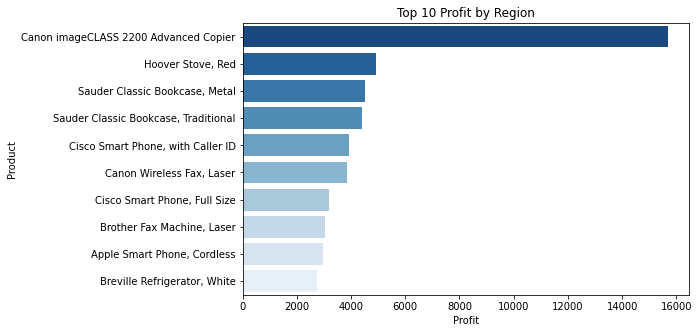

In [ ]:
style = sns.color_palette("Blues_r", 10)
plt.figure(figsize=(8,5))
sns.barplot(data=top_product, x="Profit", y="Product", palette=style)
plt.title('Top 10 Profit by Region')

#Define Big Query Function to Create Data Frame

In [ ]:
def bq_run(query_text):
  project_id = 'madt-project'

  client = bigquery.Client(project=project_id)

  df = client.query(query_text).to_dataframe()

  return df

# Graph for Chatbot

1. Top 10 Profit by Region

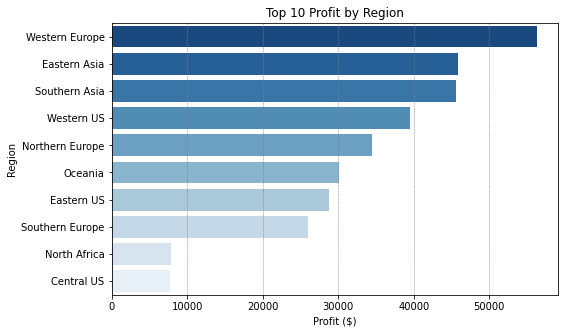

In [ ]:
#Query
query_text = '''
                SELECT 
                  region as Region, 
                  sum(profit) as Profit
                FROM `madt-project.madt7101.superstore` 
                WHERE order_date <= current_date 
                AND order_date >= datetime_trunc(current_date, year)
                GROUP BY Region
                ORDER BY Profit DESC
                LIMIT 10
             '''
#Create Data Frame
df = bq_run(query_text)

#Create Data Visualization
style = sns.color_palette("Blues_r", 10)
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Profit", y="Region", palette=style).set(xlabel='Profit ($)')

plt.grid(axis = 'x',color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title('Top 10 Profit by Region')

#save figure
plt.savefig("plot.png", bbox_inches="tight")

2. Top 10 Profit by Product

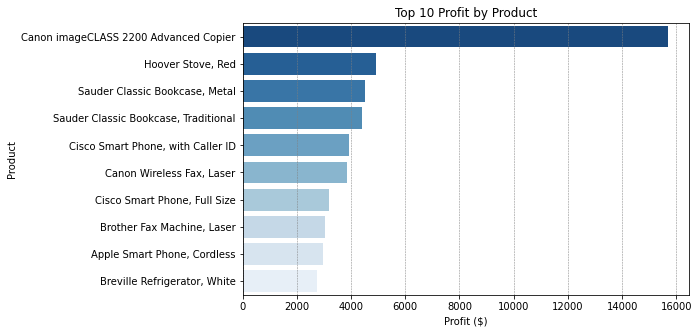

In [ ]:
#Query
query_text = '''
                SELECT 
                  product_name as Product, 
                  sum(profit) as Profit
                FROM `madt-project.madt7101.superstore` 
                WHERE order_date <= current_date 
                AND order_date >= datetime_trunc(current_date, year)
                GROUP BY Product
                ORDER BY Profit DESC
                LIMIT 10
             '''
#Create Data Frame
df = bq_run(query_text)

#Create Data Visualization
style = sns.color_palette("Blues_r", 10)
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Profit", y="Product", palette=style).set(xlabel='Profit ($)')
plt.grid(axis = 'x',color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title('Top 10 Profit by Product')

#save figure
plt.savefig("plot.png", bbox_inches="tight")

3. Sales Performance by Category

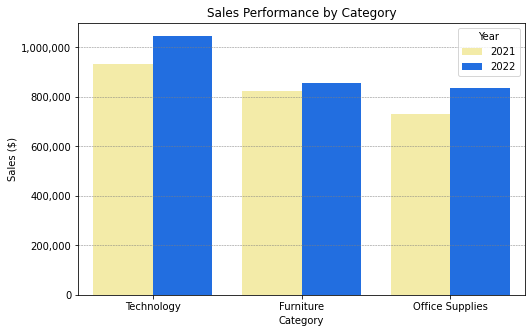

In [ ]:
#Query
query_text = '''
              SELECT 
                category as Category,
                extract(year FROM order_date) as Year, 
                sum(sales) as Sales
              FROM `madt-project.madt7101.superstore` 
              WHERE order_date <= current_date 
              AND order_date >= datetime_add(datetime_trunc(current_date, year), INTERVAL -1 year)
              GROUP BY category ,Year
              ORDER BY Sales DESC
             '''
#Create Data Frame
df = bq_run(query_text)

#Create Data Visualization
#Color setting
colors = ["#FFF59B", "#0368FF"]
sns.set_palette(sns.color_palette(colors))

plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Category", y="Sales", hue="Year").set(ylabel='Sales ($)')

#Change no. format on yaxis (https://queirozf.com/entries/matplotlib-examples-number-formatting-for-axes-labels)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.grid(axis = 'y',color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title('Sales Performance by Category')




#save figure
plt.savefig("plot.png", bbox_inches="tight")

4. Sales Performance by Segment

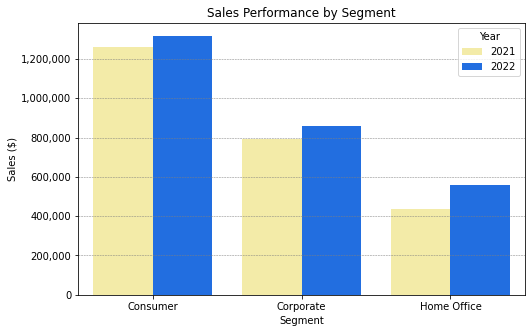

In [ ]:
#Query
query_text = '''
              SELECT 
                segment as Segment,
                extract(year FROM order_date) as Year, 
                sum(sales) as Sales
              FROM `madt-project.madt7101.superstore` 
              WHERE order_date <= current_date 
              AND order_date >= datetime_add(datetime_trunc(current_date, year), INTERVAL -1 year)
              GROUP BY Segment ,Year
              ORDER BY Sales DESC
             '''
#Create Data Frame
df = bq_run(query_text)

#Create Data Visualization
#Color setting
colors = ["#FFF59B", "#0368FF"]
sns.set_palette(sns.color_palette(colors))

plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Segment", y="Sales", hue="Year").set(ylabel='Sales ($)')

#Change no. format on yaxis (https://queirozf.com/entries/matplotlib-examples-number-formatting-for-axes-labels)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.grid(axis = 'y',color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title('Sales Performance by Segment')



#save figure
plt.savefig("plot.png", bbox_inches="tight")

5. Cost Performance by Region

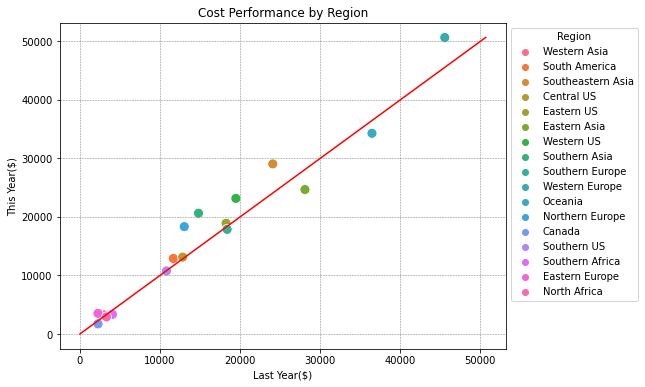

In [ ]:
#Query
query_text = '''
              SELECT 
              cur.Region AS Region,
              cur.Shipping_Cost AS This_Year,
              lst.Shipping_Cost AS Last_Year
              FROM (
                SELECT 
                  region as Region, 
                  sum(cost) as Shipping_Cost,
                FROM `madt-project.madt7101.superstore` 
                WHERE order_date <= current_date 
                AND order_date >= datetime_trunc(current_date, year)
                GROUP BY Region) cur
              LEFT JOIN (
                SELECT 
                  region as Region, 
                  sum(cost) as Shipping_Cost
                FROM `madt-project.madt7101.superstore` 
                WHERE order_date < datetime_trunc(current_date, year)
                AND order_date >= datetime_add(datetime_trunc(current_date, year), INTERVAL -1 year)
                GROUP BY Region) lst
                ON cur.Region=lst.Region
             '''
#Create Data Frame
df = bq_run(query_text)

#Create Data Visualization
plt.figure(figsize=(8,6))
ax=sns.scatterplot(data=df, x="Last_Year", y="This_Year", hue="Region", s=100)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel('Last Year($)')
plt.ylabel('This Year($)')

  #Create Line
X_plot = np.linspace(0, df["This_Year"].max(), 1000)    #Range of X
Y_plot = X_plot                   #y equation
plt.plot(X_plot, Y_plot, color='red')

plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title('Cost Performance by Region')

#save figure
plt.savefig("plot.png", bbox_inches="tight")

6. Sales Performance by Region

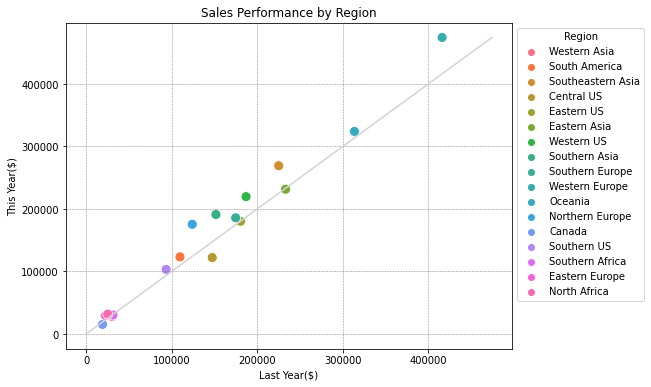

In [ ]:
#Query
query_text = '''
              SELECT 
              cur.Region AS Region,
              cur.Sales AS This_Year,
              lst.Sales AS Last_Year
              FROM (
                SELECT 
                  region as Region, 
                  sum(sales) as Sales,
                FROM `madt-project.madt7101.superstore` 
                WHERE order_date <= current_date 
                AND order_date >= datetime_trunc(current_date, year)
                GROUP BY Region) cur
              LEFT JOIN (
                SELECT 
                  region as Region, 
                  sum(sales) as Sales
                FROM `madt-project.madt7101.superstore` 
                WHERE order_date < datetime_trunc(current_date, year)
                AND order_date >= datetime_add(datetime_trunc(current_date, year), INTERVAL -1 year)
                GROUP BY Region) lst
                ON cur.Region=lst.Region
             '''
#Create Data Frame
df = bq_run(query_text)

#Create Data Visualization
plt.figure(figsize=(8,6))
ax=sns.scatterplot(data=df, x="Last_Year", y="This_Year", hue="Region", s=100)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel('Last Year($)')
plt.ylabel('This Year($)')

  #Create Line
X_plot = np.linspace(0, df["This_Year"].max(), 50000)    #Range of X
Y_plot = X_plot                   #y equation
plt.plot(X_plot, Y_plot, color='lightgray')


plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title('Sales Performance by Region')

#save figure
plt.savefig("plot.png", bbox_inches="tight")

7. Sales vs time

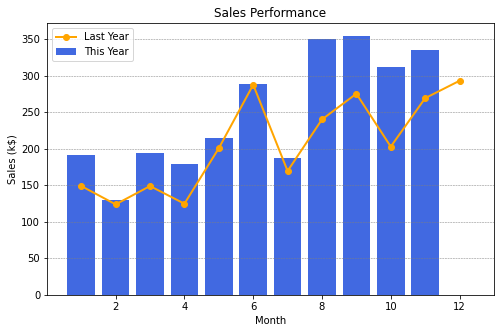

In [ ]:
#Query ฉบับปรับแก้หน่วย
query_text = '''
              SELECT 
                CAST(lst.Month AS float64) AS Month,
                COALESCE(cur.sales_this_year,0) AS sales_this_year,
                lst.sales_last_year AS sales_last_year
              FROM (
                    SELECT 
                      extract(Month FROM order_date) AS month, 
                      SUM(sales)/1000 as sales_last_year
                    FROM `madt-project.madt7101.superstore` 
                    WHERE order_date >= date_add(datetime_trunc(current_date, year), INTERVAL -1 year) AND order_date < datetime_trunc(current_date, year)
                    GROUP BY month
                      )lst
              LEFT JOIN (
                      SELECT 
                        extract(Month FROM order_date) AS month, 
                        SUM(sales)/1000 as sales_this_year
                      FROM `madt-project.madt7101.superstore` 
                      WHERE order_date <= current_date AND order_date >= datetime_trunc(current_date, year)
                      GROUP BY month
                    )cur
              ON cur.month = lst.Month
              ORDER BY lst.month
             '''
#Create Data Frame
df = bq_run(query_text)

#Create Data Visualization
plt.figure(figsize=(8,5))
plt.bar(df['Month'], df['sales_this_year'], color='royalblue', label='This Year')
plt.plot(df['Month'], df['sales_last_year'], color='orange', label='Last Year', marker='o', linewidth=2)
plt.legend()
plt.xlabel('Month')
plt.ylabel('Sales (k$)')
plt.title('Sales Performance')
plt.grid(axis = 'y', color = 'gray', linestyle = '--', linewidth = 0.5)

#save figure
plt.savefig("plot.png", bbox_inches="tight")

Text(0.5, 1.0, 'Sales Performance Matrix')

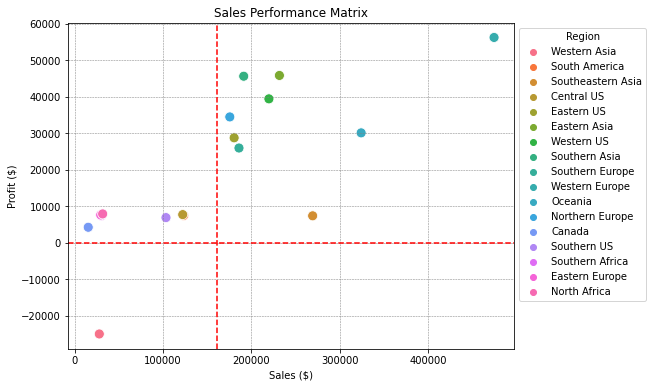

In [ ]:
#Query
query_text = '''
              SELECT
    region as Region, 
    sum(sales) AS Sales,
    sum(cost) AS Cost,
    sum(profit) AS Profit,
    IF(sum(profit)>0,'Positive', 'Negative') AS Cluster
FROM `madt-project.madt7101.superstore` 
WHERE order_date <= current_date AND order_date >= datetime_trunc(current_date, year)
GROUP BY region
             '''

#Create Data Frame
df = bq_run(query_text)

#Create Data Visualization
plt.figure(figsize=(8,6))
ax=sns.scatterplot(data=df, x="Sales", y="Profit", hue="Region", s=100)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel('Sales ($)')
plt.ylabel('Profit ($)')

#Create Segment Line
plt.axhline(y=0, color='r', linestyle='--')
plt.axvline(x=df["Sales"].mean(), color='r', linestyle='--')

plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title('Sales Performance Matrix')